In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading training dataset
df=pd.read_csv('train_data.csv')

**Variable naming**

Each variable name, prefix__suffix, consists of two parts (separated by a double underscore) that inform you of the meaning of the variable. The prefix indicates from which of the above-listed file the variable was derived (e.g. Madden-Julian oscillation, pressure, and potential evaporation from NOAA's surface_gauss etc), the suffix indicates the specific type of information that was extracted from the file.

**Variable prefixes**

- contest-slp-14d: file containing sea level pressure (slp)

- nmme0-tmp2m-34w: file containing most recent monthly NMME model forecasts for tmp2m (cancm30,cancm40, ccsm30, ccsm40, cfsv20, gfdlflora0, gfdlflorb0, gfdl0, nasa0,nmme0mean) and average forecast across those models (nmme0mean)

- contest-pres-sfc-gauss-14d: pressure

- mjo1d: MJO phase and amplitude

- contest-pevpr-sfc-gauss-14d: potential evaporation

- contest-wind-h850-14d: geopotential height at 850 millibars

    - contest-wind-h500-14d: geopotential height at 500 millibars

- contest-wind-h100-14d: geopotential height at 100 millibars

- contest-wind-h10-14d: geopotential height at 10 millibars

- contest-wind-vwnd-925-14d: longitudinal wind at 925 millibars

    - contest-wind-vwnd-250-14d: longitudinal wind at 250 millibars
- contest-wind-uwnd-250-14d: zonal wind at 250 millibars

- contest-wind-uwnd-925-14d: zonal wind at 925 millibars

- contest-rhum-sig995-14d: relative humidity

    - contest-prwtr-eatm-14d: precipitable water for entire atmosphere
- nmme-prate-34w: weeks 3-4 weighted average of monthly NMME model forecasts for precipitation

- nmme-prate-56w: weeks 5-6 weighted average of monthly NMME model forecasts for precipitation
- nmme0-prate-56w: weeks 5-6 weighted average of most recent monthly NMME model forecasts for precipitation

- nmme0-prate-34w: weeks 3-4 weighted average of most recent monthly NMME model forecasts for precipitation

- nmme-tmp2m-34w: weeks 3-4 weighted average of most recent monthly NMME model forecasts for target label, contest-tmp2m-14d__tmp2m

- nmme-tmp2m-56w: weeks 5-6 weighted average of monthly NMME model forecasts for target label, contest-tmp2m-14d__tmp2m

- mei: MEI (mei), MEI rank (rank), and Niño Index Phase (nip)

- elevation: elevation

- contest-precip-14d: measured precipitation

- climateregions: Köppen-Geigerclimateclassifications

**Variables without prefix**
Some variables do not have a prefix. Instead, each variable name in its entirely indicates the information the variable captures.

- lat: latitude of location (anonymized)
- lon: longitude of location (anonymized)
- startdate: startdate of the 14 day period
- sst: sea surface temperature
- icec: sea ice concentration
- cancm30, cancm40, ccsm30, ccsm40, cfsv20, gfdlflora0, gfdlflorb0, gfdl0, nasa0, nmme0mean: most recent forecasts from weather models

**Target**

- contest-tmp2m-14d__tmp2m: the arithmetic mean of the max and min observed temperature over the next 14 days for each location and start date, computed as (measured max temperature + measured mini temperature) / 2


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010

In [5]:
#checking shape of dataset
df.shape

(375734, 246)

In [6]:
# check the df structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375734 entries, 0 to 375733
Columns: 246 entries, index to wind-vwnd-925-2010-20
dtypes: float64(240), int64(4), object(2)
memory usage: 705.2+ MB


In [7]:
# showing datatype of all features
with pd.option_context('display.max_rows', None):
    print(df.dtypes)

index                                         int64
lat                                         float64
lon                                         float64
startdate                                    object
contest-pevpr-sfc-gauss-14d__pevpr          float64
nmme0-tmp2m-34w__cancm30                    float64
nmme0-tmp2m-34w__cancm40                    float64
nmme0-tmp2m-34w__ccsm30                     float64
nmme0-tmp2m-34w__ccsm40                     float64
nmme0-tmp2m-34w__cfsv20                     float64
nmme0-tmp2m-34w__gfdlflora0                 float64
nmme0-tmp2m-34w__gfdlflorb0                 float64
nmme0-tmp2m-34w__gfdl0                      float64
nmme0-tmp2m-34w__nasa0                      float64
nmme0-tmp2m-34w__nmme0mean                  float64
contest-wind-h10-14d__wind-hgt-10           float64
nmme-tmp2m-56w__cancm3                      float64
nmme-tmp2m-56w__cancm4                      float64
nmme-tmp2m-56w__ccsm3                       float64
nmme-tmp2m-5

In [8]:
# describe  numerical columns
df.describe()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,wind-uwnd-925-20

**Exploratory Data Analysis**

- Find Unwanted Columns
- Explore the Categorical Features
- Find Missing Values
- Explore the Numerical Features
- Find Discrete Numerical Features
- Find Continous Numerical Features
- Distribution of Continous Numerical Features
- Find Outliers in numerical features
- Explore the Correlation between numerical features

**1.Find Unwanted Columns**

**Take-away**:
- There is no unwanted column present in given dataset to remove

**2.Explore the Categorical Features**

In [9]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O'))]
categorical_features

['startdate', 'climateregions__climateregion']

In [10]:
#exploring unique value in categorical features
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is startdate and number of categories are 731
The feature is climateregions__climateregion and number of categories are 15


In [11]:
df['climateregions__climateregion'].unique()

array(['BSh', 'Cfa', 'BSk', 'BWk', 'BWh', 'Csa', 'Csb', 'Cfb', 'Dfb',
       'Dsc', 'Dfc', 'Dfa', 'Dsb', 'Dwa', 'Dwb'], dtype=object)

**Take-away**:
- there are 2 categorical features


**3. Find Missing Values**

In [12]:
with pd.option_context('display.max_rows', None):
    print(df.isnull().sum())

index                                           0
lat                                             0
lon                                             0
startdate                                       0
contest-pevpr-sfc-gauss-14d__pevpr              0
nmme0-tmp2m-34w__cancm30                        0
nmme0-tmp2m-34w__cancm40                        0
nmme0-tmp2m-34w__ccsm30                     15934
nmme0-tmp2m-34w__ccsm40                         0
nmme0-tmp2m-34w__cfsv20                         0
nmme0-tmp2m-34w__gfdlflora0                     0
nmme0-tmp2m-34w__gfdlflorb0                     0
nmme0-tmp2m-34w__gfdl0                          0
nmme0-tmp2m-34w__nasa0                          0
nmme0-tmp2m-34w__nmme0mean                      0
contest-wind-h10-14d__wind-hgt-10               0
nmme-tmp2m-56w__cancm3                          0
nmme-tmp2m-56w__cancm4                          0
nmme-tmp2m-56w__ccsm3                       10280
nmme-tmp2m-56w__ccsm4                           0


In [13]:
# find missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

nmme0-tmp2m-34w__ccsm30 0.0424  % missing values
nmme-tmp2m-56w__ccsm3 0.0274  % missing values
nmme-prate-34w__ccsm3 0.0233  % missing values
nmme0-prate-56w__ccsm30 0.0424  % missing values
nmme0-prate-34w__ccsm30 0.0424  % missing values
nmme-prate-56w__ccsm3 0.0274  % missing values
nmme-tmp2m-34w__ccsm3 0.0233  % missing values
ccsm30 0.0424  % missing values
No missing value found


**Take-away**:
- we can see above that some of rows have missing value found.

**4. Explore the Numerical Features**

In [14]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O'))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  244


,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,wind-uwnd-925-20

**Take-away**:
- There are 244 numerical features out of 246

**5.Find Discrete Numerical Features**

In [15]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 4


**Take-away**:
- there is 4 Discrete Variables in give dataset

**6.Find Continous Numerical Features**

In [16]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature ]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 240


**Take-away**:
- there are 240 continuous numerical features

In [17]:
import matplotlib.pyplot as plt

In [18]:
# #plot a univariate distribution of continues observations
plt.figure(figsize=(30,50), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(120,2,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

In [ ]:
plt.figure(figsize=(30,50), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(120,2,plotnumber)
    sns.boxplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

**7. Explore the Correlation between numerical features**

In [19]:
# # ## Checking for correlation
# cor_mat=df.corr()
# fig = plt.figure()
# sns.heatmap(cor_mat,annot=True)

C:\Users\adity\AppData\Local\Temp\ipykernel_10000\2006547817.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['contest-tmp2m-14d__tmp2m'],color='blue')


<AxesSubplot: xlabel='contest-tmp2m-14d__tmp2m', ylabel='Density'>

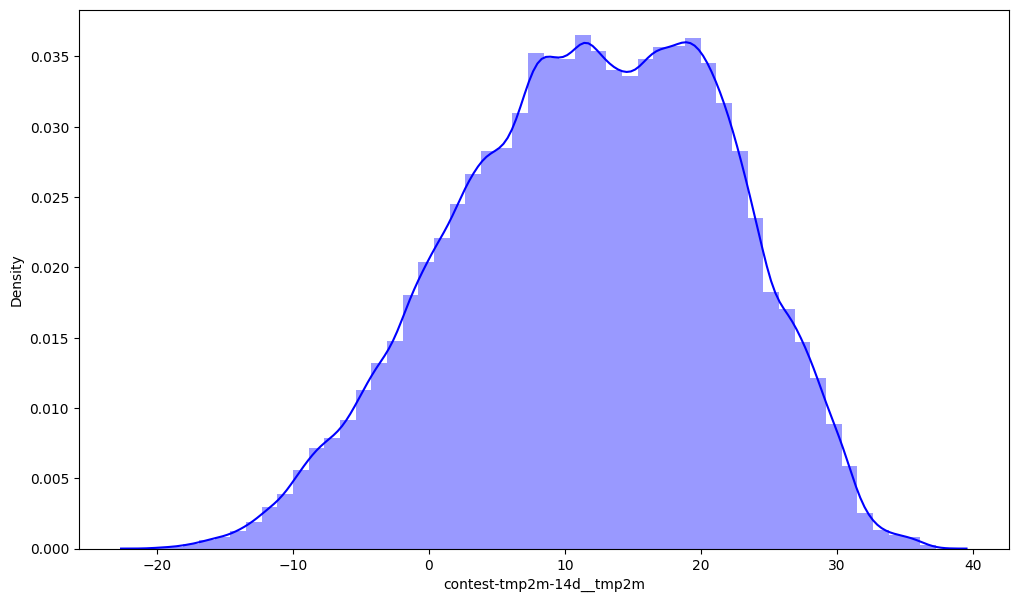

In [85]:
plt.figure(figsize=(12,7))
sns.distplot(df['contest-tmp2m-14d__tmp2m'],color='blue')

# Feature Engineering

- Drop unwanted Features
- Handle Missing Values
- Handle Categorical Features


As per Exploratory Data Analysis EDA, 
- some missing value found
- 2 categorical features
- defaut features does not play imp role


**1.Handle Missing Values**

In [20]:
#Handling missing value with replacing by just previous values
for i in df.columns:
    if(df[i].isnull().sum()>0):
        df[i]=df[i].fillna(method='bfill')

In [21]:
df.isnull().sum().sum()

0

In [22]:
with pd.option_context('display.max_rows', None):
    print(df.isnull().sum())

index                                       0
lat                                         0
lon                                         0
startdate                                   0
contest-pevpr-sfc-gauss-14d__pevpr          0
nmme0-tmp2m-34w__cancm30                    0
nmme0-tmp2m-34w__cancm40                    0
nmme0-tmp2m-34w__ccsm30                     0
nmme0-tmp2m-34w__ccsm40                     0
nmme0-tmp2m-34w__cfsv20                     0
nmme0-tmp2m-34w__gfdlflora0                 0
nmme0-tmp2m-34w__gfdlflorb0                 0
nmme0-tmp2m-34w__gfdl0                      0
nmme0-tmp2m-34w__nasa0                      0
nmme0-tmp2m-34w__nmme0mean                  0
contest-wind-h10-14d__wind-hgt-10           0
nmme-tmp2m-56w__cancm3                      0
nmme-tmp2m-56w__cancm4                      0
nmme-tmp2m-56w__ccsm3                       0
nmme-tmp2m-56w__ccsm4                       0
nmme-tmp2m-56w__cfsv2                       0
nmme-tmp2m-56w__gfdl              

Now total sum of misssing values are 0

**2.Handle Categorical Features**

In [23]:
#1.
df['startdate'] = df['startdate'].astype('datetime64[ns]')

In [24]:
df['year']= df['startdate'].dt.year
df['month']= df['startdate'].dt.month
df['day']= df['startdate'].dt.day

In [25]:
#Dropping startdate column ,now it's no use of it
df.drop(columns=['startdate'],inplace=True)

In [26]:
df.shape

(375734, 248)

In [27]:
#2.
from category_encoders import OneHotEncoder
df=OneHotEncoder(cols=['climateregions__climateregion']).fit(df).transform(df)

In [28]:
df.shape

(375734, 262)

In [29]:
# for i in df.columns:
#     print(i)

# Model Selection

In [30]:
# will try to use below two models that are Linear Regresson,XGBRegressor and RandomForestRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#from sklearn.model_selection import GridSearchCV


In [31]:
x_train=df.drop(columns=['contest-tmp2m-14d__tmp2m'])

In [32]:
x_train.shape

(375734, 261)

In [33]:
y_train=df['contest-tmp2m-14d__tmp2m']

In [34]:
y_train.shape

(375734,)

In [35]:
x_test=pd.read_csv('test_data.csv')

In [36]:
x_test.shape

(31354, 245)

In [37]:
index=x_test['index']

In [38]:

x_test['startdate'] = x_test['startdate'].astype('datetime64[ns]')

In [39]:
x_test['year']= x_test['startdate'].dt.year
x_test['month']= x_test['startdate'].dt.month
x_test['day']= x_test['startdate'].dt.day 

In [40]:
x_test.shape

(31354, 248)

In [41]:
x_test.drop(columns=['startdate'],inplace=True)

In [42]:
from category_encoders import OneHotEncoder
x_test=OneHotEncoder(cols=['climateregions__climateregion']).fit(x_test).transform(x_test)

In [43]:
x_test.shape

(31354, 261)

In [44]:
x_train.drop(columns=['index'],inplace=True)

In [45]:
x_test.drop(columns=['index'],inplace=True)

# Model Building

In [46]:
lr=LinearRegression()

In [47]:
lr.fit(x_train,y_train)

LinearRegression()

In [48]:
lr.score(x_train,y_train)

0.9830286393372043

In [49]:
lr_pred=lr.predict(x_test)

In [50]:
lr_pred

array([28.81738633, 28.75167849, 28.68725006, ...,  7.27961465,
        7.80698462,  8.42583585])

In [51]:
sample_prediction=pd.DataFrame(lr_pred,columns=['contest-tmp2m-14d__tmp2m'])

In [52]:
sample_prediction

,contest-tmp2m-14d__tmp2m
0,28.817386
1,28.751678
2,28.687250
3,28.793373
4,28.988410
...,...
31349,8.261644
31350,8.236981
31351,7.279615
31352,7.806985


In [53]:
sample_prediction['index']=index

In [54]:
sample_prediction

,contest-tmp2m-14d__tmp2m,index
0,28.817386,375734
1,28.751678,375735
2,28.687250,375736
3,28.793373,375737
4,28.988410,375738
...,...,...
31349,8.261644,407083
31350,8.236981,407084
31351,7.279615,407085
31352,7.806985,407086


In [55]:
sample_prediction.to_csv('sample_prediction.csv')

--------------------------------------------------------------------------2nd model------------------------------------------------

In [56]:
xgb_r = XGBRegressor(objective ='reg:linear',n_estimators = 20, seed = 123)

In [57]:
xgb_r.fit(x_train,y_train)

[13:25:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=20, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [58]:
xgb_pred=xgb_r.predict(x_test)

In [59]:
xgb_pred

array([28.058252 , 28.058252 , 28.603815 , ...,  1.5266548,  2.0139968,
        1.8055855], dtype=float32)

In [60]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=XGBRegressor(),X=x_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.95199922 0.98105196 0.97796545 0.97376856 0.95166645]
0.9672903269781796


In [61]:
xgb_pred=pd.DataFrame(xgb_pred,columns=['contest-tmp2m-14d__tmp2m'])

In [62]:
xgb_pred['index']=index

In [63]:
xgb_pred.to_csv('xgb_pred_sample.csv')

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

-----------------------------------------------------------------------3rd model------------------------------------------------------------------

In [65]:
random_reg=RandomForestRegressor(n_estimators = 50, random_state = 0,n_jobs=-1)
random_reg.fit(x_train,y_train)
random_predict=random_reg.predict(x_test)


In [66]:
random_predict

array([28.96947096, 28.85404572, 28.61208945, ...,  3.39337459,
        2.74526259,  2.60171094])

In [67]:
random_predict=pd.DataFrame(random_predict,columns=['contest-tmp2m-14d__tmp2m'])

In [68]:
random_predict.head()

,contest-tmp2m-14d__tmp2m
0,28.969471
1,28.854046
2,28.612089
3,28.534641
4,28.406642


In [69]:
random_predict['index']=index

In [70]:
random_predict.head()

,contest-tmp2m-14d__tmp2m,index
0,28.969471,375734
1,28.854046,375735
2,28.612089,375736
3,28.534641,375737
4,28.406642,375738


In [71]:
random_predict.to_csv("random_forest_prediction.csv")

In [72]:
from sklearn.linear_model import Lasso

In [73]:
lar_lasso=Lasso()

In [74]:
lar_lasso.fit(x_train,y_train)

d:\Data-Science\ineuron\ineuron-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.291e+05, tolerance: 3.659e+03
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [75]:
lar_pred=lar_lasso.predict(x_test)

In [76]:
lar_pred

array([27.57520958, 27.5953427 , 27.60942951, ...,  6.19762437,
        6.4302894 ,  6.95124025])

In [77]:
lar_lasso.score(x_train,y_train)

0.9739463698592767

In [78]:
lasso_sample_prediction=pd.DataFrame(lar_pred,columns=['contest-tmp2m-14d__tmp2m'])

In [79]:
lasso_sample_prediction

,contest-tmp2m-14d__tmp2m
0,27.575210
1,27.595343
2,27.609430
3,27.700416
4,27.751499
...,...
31349,6.954275
31350,7.034587
31351,6.197624
31352,6.430289


In [80]:
lasso_sample_prediction['index']=index

In [82]:
lasso_sample_prediction.to_csv('lasso_prediction.csv')

In [87]:
correlation=df.corr(method='pearson')

In [88]:
correlation.to_csv('correlation.csv')

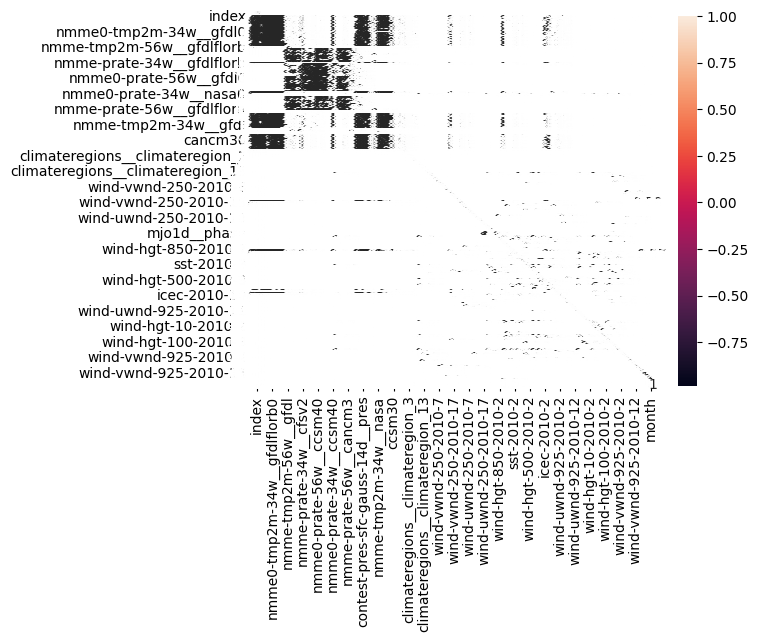

In [89]:

import seaborn as sns
 
# checking correlation using heatmap
#Loading dataset
 
#plotting the heatmap for correlation
ax = sns.heatmap(df.corr(), annot=True)